<a href="https://colab.research.google.com/github/AfifNurraihan/Last_Project_A_and_B/blob/main/Tugas_Akhir_A_Afif_Nurraihan_1800015022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COVID-19 Indonesia Dataset

Dataset COVID-19 di Indonesia ini dibuat untuk mengetahui berbagai faktor yang dapat menjadi pertimbangan dalam pengambilan keputusan terkait tingkat keketatan di setiap provinsi di Indonesia. Data ini dikumpulkan berdasarkan time series, baik di tingkat negara (Indonesia)maupun di tingkat provinsi. Jika diperlukan di provinsi tertentu, juga tersedia di tingkat kota / daerah. Tersedia juga data demografi, serta penghitungan antara data demografis dan data pandemi COVID-19.


## Pertanyaan Analisis

1. Pulau mana saja yang paling banyak kasus kematian akibat Covid-19 ?

2. Bagaimana jumlah presentase tingkat kasus kematian akibat Covid-19 di Pulau Jawa selama bulan Maret 2020 s/d Desember 2020 per-provinsi ?

3. Bagaimana jumlah presentase tingkat kasus Covid-19 di Pulau Jawa selama bulan Maret 2020 s/d Desember 2020 per-provinsi ?

## Data Preparation

In [ ]:
from operator import itemgetter
from networkx.algorithms import community
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca file 
covd19_df = pd.read_csv("covid_19_indonesia_time_series_all.csv")
# Keterangan isi index 
print(covd19_df.keys())
covd19_df

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')


,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,20,39,430,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.09,0.00,1.84,4.09%,7.98%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,20,39,432,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.27,0.00,1.84,4.07%,7.94%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,5,120,-113,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.07,0.27,0.00,0.11,41.67%,1000.00%,NaN,NaN
4,3/2/2020,ID-RI,Riau,1,0,0,1,2,1,1,0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.16,50.00%,50.00%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,12/31/2020,ID-SG,Sulawesi Tenggara,38,0,24,14,7907,147,6696,1064,Province,NaN,Sulawesi Tenggara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,15,2.0,219,377.0,1911.0,38068,2635461,69.23,122.070311,-4.124689,14.42,3000.23,0.00,55.78,1.86%,84.68%,0.60,0.00
9955,12/31/2020,ID-SA,Sulawesi Utara,88,1,0,87,9671,310,7003,2358,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,33.31,3660.65,0.38,117.34,3.21%,72.41%,2.59,0.25
9956,12/31/2020,ID-SB,Sumatera Barat,117,3,26,88,23464,522,18030,4912,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,21.20,4251.31,0.54,94.58,2.22%,76.84%,0.94,3.00
9957,12/31/2020,ID-SS,Sumatera Selatan,92,1,50,41,11826,599,9364,1863,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,11.20,1439.11,0.12,72.89,5.07%,79.18%,0.84,0.50


In [ ]:
# Menyajikan Tanggal,Lokasi,Kasus Baru,Kasus Kematian,Total kasus,Total kematian dan Island
ind_cov_df = pd.DataFrame(covd19_df[['Date','Location', 'Island','New Cases', 'New Deaths','Total Cases', 'Total Deaths']])
ind_cov_df["Date"] = ind_cov_df["Date"].astype('datetime64[ns]')
ind_cov_df.sort_values(by=["Date"])

,Date,Location,Island,New Cases,New Deaths,Total Cases,Total Deaths
0,2020-03-01,DKI Jakarta,Jawa,2,0,489,20
1,2020-03-02,DKI Jakarta,Jawa,2,0,491,20
2,2020-03-02,Indonesia,NaN,2,0,2,0
3,2020-03-02,Jawa Barat,Jawa,3,0,12,5
4,2020-03-02,Riau,Sumatera,1,0,2,1
...,...,...,...,...,...,...,...
9936,2020-12-31,Kalimantan Barat,Kalimantan,25,0,3118,27
9937,2020-12-31,Kalimantan Selatan,Kalimantan,66,4,15303,585
9938,2020-12-31,Kalimantan Tengah,Kalimantan,68,0,9740,200
9940,2020-12-31,Kalimantan Utara,Kalimantan,54,0,3794,56


In [ ]:
# Total kasus dan Total kematian per-provinsi dalam kurun waktu MARET s/d DESEMBER.
ind_cov19_df = pd.DataFrame(covd19_df[['Date','Location','Island','Total Cases','Total Deaths']])
ind_cov19_df["Date"] = ind_cov19_df["Date"].astype('datetime64[ns]')
ind_cov19_df.sort_values(by=["Date"])

,Date,Location,Island,Total Cases,Total Deaths
0,2020-03-01,DKI Jakarta,Jawa,489,20
1,2020-03-02,DKI Jakarta,Jawa,491,20
2,2020-03-02,Indonesia,NaN,2,0
3,2020-03-02,Jawa Barat,Jawa,12,5
4,2020-03-02,Riau,Sumatera,2,1
...,...,...,...,...,...
9936,2020-12-31,Kalimantan Barat,Kalimantan,3118,27
9937,2020-12-31,Kalimantan Selatan,Kalimantan,15303,585
9938,2020-12-31,Kalimantan Tengah,Kalimantan,9740,200
9940,2020-12-31,Kalimantan Utara,Kalimantan,3794,56


In [ ]:
# Jumlah Total Kasus Covid-19 per-Provinsi
ind_cov19_Provinsi_df = ind_cov19_df.groupby(["Location"])
ind_cov19_Provinsi_df['Total Cases'].sum()

Location
Aceh                            821156
Bali                           1663771
Banten                         1357253
Bengkulu                        186667
DKI Jakarta                   15007417
Daerah Istimewa Yogyakarta      637309
Gorontalo                       434274
Indonesia                     60573721
Jambi                           186101
Jawa Barat                     5450230
Jawa Tengah                    5536559
Jawa Timur                     8353568
Kalimantan Barat                254539
Kalimantan Selatan             1892943
Kalimantan Tengah               757040
Kalimantan Timur               1902368
Kalimantan Utara                174074
Kepulauan Bangka Belitung       114256
Kepulauan Riau                  518596
Lampung                         321670
Maluku                          555846
Maluku Utara                    379354
Nusa Tenggara Barat             663162
Nusa Tenggara Timur             118704
Papua                          1298453
Papua Barat     

In [ ]:
# Jumlah Total kematian Covid-19
ind_cov19_Provinsi_df['Total Deaths'].sum()

Location
Aceh                            31871
Bali                            45362
Banten                          42245
Bengkulu                         8583
DKI Jakarta                    365486
Daerah Istimewa Yogyakarta      15396
Gorontalo                       12336
Indonesia                     2148683
Jambi                            3310
Jawa Barat                     110134
Jawa Tengah                    275933
Jawa Timur                     600965
Kalimantan Barat                 2533
Kalimantan Selatan              80933
Kalimantan Tengah               26293
Kalimantan Timur                60272
Kalimantan Utara                 1762
Kepulauan Bangka Belitung        1543
Kepulauan Riau                  14734
Lampung                         14132
Maluku                           8086
Maluku Utara                    13090
Nusa Tenggara Barat             34829
Nusa Tenggara Timur              1951
Papua                           16376
Papua Barat                      7903
Ria

In [ ]:
#Total Kasus kematian Covid-19 per-pulau
ind_cov19_Pulau_df = ind_cov19_df.groupby(["Island"])
ind_cov19_Pulau_df['Total Deaths'].sum()

Island
Jawa             1410159
Kalimantan        171793
Maluku             21176
Nusa Tenggara      82142
Papua              24279
Sulawesi          149062
Sumatera          296104
Name: Total Deaths, dtype: int64

## Data Visualization

###**Jumlah Kasus Kematian Covid-19 per-pulau**

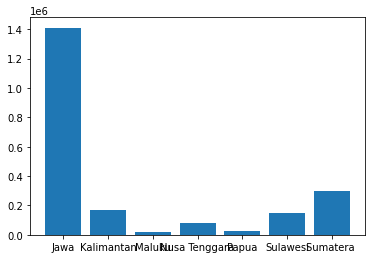

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

island = np.array(["Jawa", "Kalimantan", "Maluku", "Nusa Tenggara","Papua","Sulawesi","Sumatera "])
jumlah_kasus = np.array([1410159, 171793,  21176, 82142,24279,149062,296104])

plt.bar(island, jumlah_kasus)
plt.show()

###**Presentase Kematian Kasus Covid-19 di Pulau JAWA**

In [ ]:
import plotly.graph_objects as go

pulau_jawa = ['DKI Jakarta','Daerah Istimewa Yogyakarta','Jawa Barat','Jawa Tengah','Jawa Timur']
kasus_kematian_cov19 = [ 365486, 15396, 110134, 275933, 600965]

fig = go.Figure(data=[go.Pie(labels=pulau_jawa, values=kasus_kematian_cov19)])
fig.show()

###**Presentase Kasus Covid-19 di Pulau JAWA**

In [ ]:
import plotly.graph_objects as go

pulau_jawa = ['DKI Jakarta','Daerah Istimewa Yogyakarta','Jawa Barat','Jawa Tengah','Jawa Timur']
kasus_cov19 = [15007417, 637309, 5450230, 5536559,  8353568]

fig = go.Figure(data=[go.Pie(labels=pulau_jawa, values=kasus_cov19)])
fig.show()

Dari ketiga grafik diatas kita dapatkan bahwasannya, Pulau Jawa merupakan pulau dengan kasus kematian akibat Covid-19 terbanyak serta untuk jumlah kasus Covid-19 per-provinsi di Pulau Jawa terbesar dipegang oleh DKI Jakarta dan kasus kematian akibat covid-19 per-provinsi di Pulau Jawa dipegang oleh Jawa Timur.

Data yang cukup mencengangkan bukan ? Selama ini kita merasa sudah aman namun nyatanya Covid-19 masih ada disekitar kita.

Tetap patuhi Protokol Kesehatan serta terapkan Aman, Iman, dan Imun.

Fastabiqul Khairats, Semoga bermanfaat.